<a href="https://colab.research.google.com/github/JonathanSum/pytorch-Deep-Learning_colab/blob/master/Ch8_1_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [2]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [3]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch6/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Extracting ../data-unversioned/p1ch6/cifar-10-python.tar.gz to ../data-unversioned/p1ch6/


In [4]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


In [5]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [6]:
connected_model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

In [7]:
numel_list = [p.numel()
              for p in connected_model.parameters()
              if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [8]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))

In [9]:
numel_list = [p.numel() for p in first_model.parameters()]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

In [10]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

In [11]:
conv = nn.Conv2d(3, 16, kernel_size=5) # <1>
conv

Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))

In [12]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 5, 5]), torch.Size([16]))

In [13]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 28, 28]))

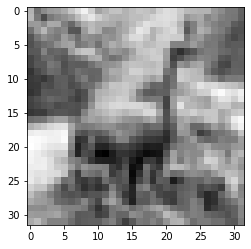

In [14]:
plt.imshow(img.mean(0), cmap='gray')
plt.show()

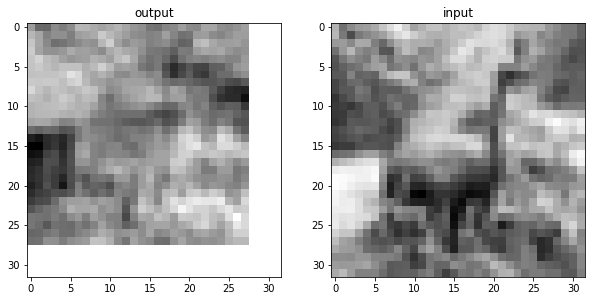

In [15]:
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F2_PyTorch.png')  # bookskip
plt.show()

In [16]:
conv = nn.Conv2d(3, 1, kernel_size=5, padding=1) # <1>
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 30, 30]))

In [17]:
with torch.no_grad():
    conv.bias.zero_()
    
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

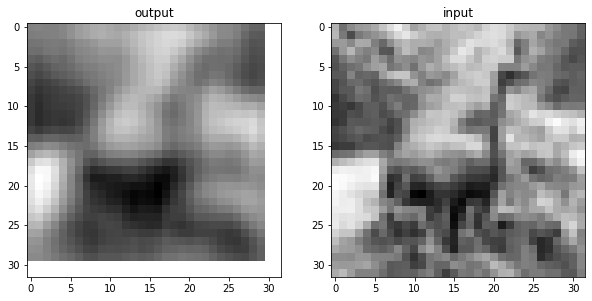

In [18]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F4_PyTorch.png')  # bookskip
plt.show()

In [21]:
# conv = nn.Conv2d(3, 1, kernel_size=5, padding=1)

# with torch.no_grad():
#     conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
#                                    [-1.0, 0.0, 1.0],
#                                    [-1.0, 0.0, 1.0]])
#     conv.bias.zero_()

RuntimeError: ignored

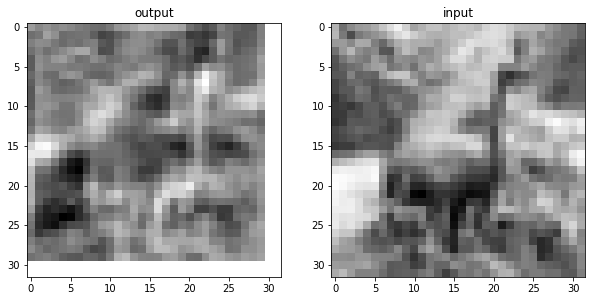

In [22]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F5_PyTorch.png')  # bookskip
plt.show()

In [23]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [24]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=5, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # ...
            )

In [48]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=5, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # ... <1>
            nn.Linear(8 * 6 * 6, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

In [49]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(13738, [1200, 16, 3200, 8, 9216, 32, 64, 2])

In [50]:
# model(img.unsqueeze(0))

In [51]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=5, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 6 * 6, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 6 * 6) # <1>
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [52]:
model = Net()

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(13738, [1200, 16, 3200, 8, 9216, 32, 64, 2])

In [53]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=5, padding=1)
        self.fc1 = nn.Linear(8 * 6 * 6, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 6 * 6)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [54]:
model = Net()
model(img.unsqueeze(0))

tensor([[0.0805, 0.1470]], grad_fn=<AddmmBackward>)

In [55]:
import datetime  # <1>

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):  # <2>
        loss_train = 0.0
        for imgs, labels in train_loader:  # <3>
            
            outputs = model(imgs)  # <4>
            
            loss = loss_fn(outputs, labels)  # <5>

            optimizer.zero_grad()  # <6>
            
            loss.backward()  # <7>
            
            optimizer.step()  # <8>

            loss_train += loss.item()  # <9>

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))  # <10>

In [56]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)  # <1>

model = Net()  #  <2>
optimizer = optim.SGD(model.parameters(), lr=1e-2)  #  <3>
loss_fn = nn.CrossEntropyLoss()  #  <4>

training_loop(  # <5>
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2021-01-18 00:01:50.686615 Epoch 1, Training loss 0.5672086680391032
2021-01-18 00:02:12.532253 Epoch 10, Training loss 0.3353022316079231
2021-01-18 00:02:36.637249 Epoch 20, Training loss 0.2887068551247287
2021-01-18 00:03:00.978459 Epoch 30, Training loss 0.26064814826485455
2021-01-18 00:03:25.055635 Epoch 40, Training loss 0.23919134069779877
2021-01-18 00:03:48.818240 Epoch 50, Training loss 0.21486452416439725
2021-01-18 00:04:12.374553 Epoch 60, Training loss 0.19569989958196687
2021-01-18 00:04:36.284742 Epoch 70, Training loss 0.17618571637067826
2021-01-18 00:05:00.307681 Epoch 80, Training loss 0.16049717340594644
2021-01-18 00:05:24.380392 Epoch 90, Training loss 0.13865793574672597
2021-01-18 00:05:48.388756 Epoch 100, Training loss 0.11859998147294021


In [57]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():  # <1>
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <2>
                total += labels.shape[0]  # <3>
                correct += int((predicted == labels).sum())  # <4>

        print("Accuracy {}: {:.2f}".format(name , correct / total))

validate(model, train_loader, val_loader)

Accuracy train: 0.95
Accuracy val: 0.88


In [58]:
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')

In [59]:
loaded_model = Net()  # <1>
loaded_model.load_state_dict(torch.load(data_path
                                        + 'birds_vs_airplanes.pt'))

<All keys matched successfully>

In [60]:
device = (torch.device('cuda') if torch.cuda.is_available()
          else torch.device('cpu'))
print(f"Training on device {device}.")

Training on device cuda.


In [61]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)  # <1>
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))

In [62]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = Net().to(device=device)  # <1>
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2021-01-18 00:06:04.004712 Epoch 1, Training loss 0.5574041026033414
2021-01-18 00:06:07.695893 Epoch 10, Training loss 0.32713525244005165
2021-01-18 00:06:11.753428 Epoch 20, Training loss 0.2847682620594456
2021-01-18 00:06:15.830664 Epoch 30, Training loss 0.25969915144192945
2021-01-18 00:06:19.917740 Epoch 40, Training loss 0.233723970758877
2021-01-18 00:06:24.039158 Epoch 50, Training loss 0.21463378922195192
2021-01-18 00:06:28.186217 Epoch 60, Training loss 0.19596342481435483
2021-01-18 00:06:32.278925 Epoch 70, Training loss 0.17871493528223342
2021-01-18 00:06:36.418229 Epoch 80, Training loss 0.15766142311084802
2021-01-18 00:06:40.513620 Epoch 90, Training loss 0.14361076036788475
2021-01-18 00:06:44.583902 Epoch 100, Training loss 0.13037010028388848


In [63]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)
all_acc_dict = collections.OrderedDict()

def validate(model, train_loader, val_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <1>
                total += labels.shape[0]
                correct += int((predicted == labels).sum())

        print("Accuracy {}: {:.2f}".format(name , correct / total))
        accdict[name] = correct / total
    return accdict

all_acc_dict["baseline"] = validate(model, train_loader, val_loader)

Accuracy train: 0.95
Accuracy val: 0.87


In [64]:
loaded_model = Net().to(device=device)
loaded_model.load_state_dict(torch.load(data_path
                                        + 'birds_vs_airplanes.pt',
                                        map_location=device))

<All keys matched successfully>

In [77]:
class NetWidth(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, padding=1)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=5, padding=1)
        self.fc1 = nn.Linear(16 * 6 * 6, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 16 * 6 * 6)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [78]:
model = NetWidth().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

validate(model, train_loader, val_loader)

2021-01-18 00:28:26.663237 Epoch 1, Training loss 0.5441121757030487
2021-01-18 00:28:30.311207 Epoch 10, Training loss 0.31785458525654614
2021-01-18 00:28:34.355854 Epoch 20, Training loss 0.258371637410419
2021-01-18 00:28:38.415891 Epoch 30, Training loss 0.2165413322342429
2021-01-18 00:28:42.504123 Epoch 40, Training loss 0.18162464034880044
2021-01-18 00:28:46.530089 Epoch 50, Training loss 0.15035483895973034
2021-01-18 00:28:50.562983 Epoch 60, Training loss 0.12053975865102498
2021-01-18 00:28:54.547115 Epoch 70, Training loss 0.09098500338424544
2021-01-18 00:28:58.584680 Epoch 80, Training loss 0.0625035388537558
2021-01-18 00:29:02.580564 Epoch 90, Training loss 0.03998039634957625
2021-01-18 00:29:06.573807 Epoch 100, Training loss 0.024891945515658445
Accuracy train: 0.97
Accuracy val: 0.88


{'train': 0.9699, 'val': 0.8775}

In [79]:
class NetWidth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=5, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=5,
                               padding=1)
        self.fc1 = nn.Linear(6 * 6 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 6 * 6 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out


In [80]:
model = NetWidth(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

all_acc_dict["width"] = validate(model, train_loader, val_loader)

2021-01-18 00:29:08.639179 Epoch 1, Training loss 0.5411434053995048
2021-01-18 00:29:12.338952 Epoch 10, Training loss 0.3093263991888921
2021-01-18 00:29:16.381341 Epoch 20, Training loss 0.2562661513116709
2021-01-18 00:29:20.466207 Epoch 30, Training loss 0.21323384638804538
2021-01-18 00:29:24.496856 Epoch 40, Training loss 0.1781808425951156
2021-01-18 00:29:28.563995 Epoch 50, Training loss 0.14518616827809885
2021-01-18 00:29:32.636311 Epoch 60, Training loss 0.1124717522839642
2021-01-18 00:29:36.645231 Epoch 70, Training loss 0.08161282655634698
2021-01-18 00:29:40.693863 Epoch 80, Training loss 0.055176477268290745
2021-01-18 00:29:44.756442 Epoch 90, Training loss 0.036015648727014564
2021-01-18 00:29:48.777019 Epoch 100, Training loss 0.023472136132727573
Accuracy train: 0.99
Accuracy val: 0.88


In [81]:
sum(p.numel() for p in model.parameters())

33778

In [82]:
def training_loop_l2reg(n_epochs, optimizer, model, loss_fn,
                        train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            l2_lambda = 0.001
            l2_norm = sum(p.pow(2.0).sum()
                          for p in model.parameters())  # <1>
            loss = loss + l2_lambda * l2_norm

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))


In [83]:
model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop_l2reg(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["l2 reg"] = validate(model, train_loader, val_loader)

2021-01-18 00:29:49.663273 Epoch 1, Training loss 0.6081016411067574
2021-01-18 00:29:55.064917 Epoch 10, Training loss 0.3590327417774565
2021-01-18 00:30:01.096201 Epoch 20, Training loss 0.3162141340743205
2021-01-18 00:30:07.112422 Epoch 30, Training loss 0.2874802004569655
2021-01-18 00:30:13.125562 Epoch 40, Training loss 0.2653866719668079
2021-01-18 00:30:19.148212 Epoch 50, Training loss 0.24590984565816867
2021-01-18 00:30:25.060891 Epoch 60, Training loss 0.22884414729419028
2021-01-18 00:30:31.081391 Epoch 70, Training loss 0.21369962470167003
2021-01-18 00:30:37.112388 Epoch 80, Training loss 0.1993749558830717
2021-01-18 00:30:43.099765 Epoch 90, Training loss 0.18509321000166
2021-01-18 00:30:49.109431 Epoch 100, Training loss 0.17155906425160208
Accuracy train: 0.86
Accuracy val: 0.83


In [84]:
class NetDropout(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=5, padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.4)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=5,
                               padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(6 * 6 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.conv1_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = self.conv2_dropout(out)
        out = out.view(-1, 6 * 6 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [85]:
model = NetDropout(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["dropout"] = validate(model, train_loader, val_loader)

2021-01-18 00:30:49.845979 Epoch 1, Training loss 0.5585550121061361
2021-01-18 00:30:53.787249 Epoch 10, Training loss 0.37839232688876473
2021-01-18 00:30:58.129758 Epoch 20, Training loss 0.3507448516453907
2021-01-18 00:31:02.521236 Epoch 30, Training loss 0.33142322899809307
2021-01-18 00:31:07.026668 Epoch 40, Training loss 0.31178298791882336
2021-01-18 00:31:11.475674 Epoch 50, Training loss 0.29267697586755087
2021-01-18 00:31:15.948178 Epoch 60, Training loss 0.2817968895101243
2021-01-18 00:31:20.329707 Epoch 70, Training loss 0.2718909647149645
2021-01-18 00:31:24.705568 Epoch 80, Training loss 0.2622619166875341
2021-01-18 00:31:29.075147 Epoch 90, Training loss 0.25345538404716805
2021-01-18 00:31:33.427683 Epoch 100, Training loss 0.23621272153345643
Accuracy train: 0.90
Accuracy val: 0.87


In [86]:
class NetBatchNorm(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=5, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_chans1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=5, 
                               padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=n_chans1 // 2)
        self.fc1 = nn.Linear(6 * 6 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = out.view(-1, 6 * 6 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [87]:
model = NetBatchNorm(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["batch_norm"] = validate(model, train_loader, val_loader)

2021-01-18 00:31:43.755453 Epoch 1, Training loss 0.48176964680859996
2021-01-18 00:31:48.197898 Epoch 10, Training loss 0.2656866928954033
2021-01-18 00:31:53.108952 Epoch 20, Training loss 0.174078694906584
2021-01-18 00:31:58.009940 Epoch 30, Training loss 0.0920859991697369
2021-01-18 00:32:02.867405 Epoch 40, Training loss 0.04420129383564185
2021-01-18 00:32:07.738338 Epoch 50, Training loss 0.013122659140996112
2021-01-18 00:32:12.634562 Epoch 60, Training loss 0.005532573347994287
2021-01-18 00:32:17.487566 Epoch 70, Training loss 0.0032692718694793286
2021-01-18 00:32:22.349210 Epoch 80, Training loss 0.0022348781015462935
2021-01-18 00:32:27.182915 Epoch 90, Training loss 0.0016593123681600068
2021-01-18 00:32:32.069571 Epoch 100, Training loss 0.001292445373596849
Accuracy train: 1.00
Accuracy val: 0.89


In [102]:
class NetDepth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=5, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=5,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=5, padding=1)
        self.fc1 = nn.Linear(2 * 2 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)

        out = out.view(-1, 2 * 2 * self.n_chans1 // 2)

        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [103]:
model = NetDepth(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["depth"] = validate(model, train_loader, val_loader)

2021-01-18 00:56:09.446833 Epoch 1, Training loss 0.649695083973514
2021-01-18 00:56:13.693314 Epoch 10, Training loss 0.335631963553702
2021-01-18 00:56:18.400487 Epoch 20, Training loss 0.27240916469674203
2021-01-18 00:56:23.119719 Epoch 30, Training loss 0.22322388828560047
2021-01-18 00:56:27.800176 Epoch 40, Training loss 0.17806443320527957
2021-01-18 00:56:32.583713 Epoch 50, Training loss 0.13487770346699246
2021-01-18 00:56:37.297550 Epoch 60, Training loss 0.08797431853451547
2021-01-18 00:56:41.952431 Epoch 70, Training loss 0.07450816005610736
2021-01-18 00:56:46.618686 Epoch 80, Training loss 0.02444857274253325
2021-01-18 00:56:51.282777 Epoch 90, Training loss 0.009232810169760922
2021-01-18 00:56:55.919395 Epoch 100, Training loss 0.004190350129346179
Accuracy train: 1.00
Accuracy val: 0.90


In [124]:
class NetRes(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=5, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=5,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=5, padding=2)
        self.fc1 = nn.Linear(3 * 3 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        # print(out.shape)
        out1 = out

        out = F.max_pool2d(torch.relu(self.conv3(out)) + out1, 2)
        # print(out.shape)
        out = out.view(-1, 3 * 3 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [125]:
model = NetRes(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["res"] = validate(model, train_loader, val_loader)

2021-01-18 01:04:03.523116 Epoch 1, Training loss 0.6117263430622732
2021-01-18 01:04:07.860146 Epoch 10, Training loss 0.3041455964943406
2021-01-18 01:04:12.748363 Epoch 20, Training loss 0.24520518578541506
2021-01-18 01:04:17.608054 Epoch 30, Training loss 0.19405303605992325
2021-01-18 01:04:22.458602 Epoch 40, Training loss 0.13989758619647116
2021-01-18 01:04:27.242429 Epoch 50, Training loss 0.0938817648940785
2021-01-18 01:04:32.048067 Epoch 60, Training loss 0.05031976263946409
2021-01-18 01:04:36.859271 Epoch 70, Training loss 0.021297352260963364
2021-01-18 01:04:41.693076 Epoch 80, Training loss 0.007912669461339143
2021-01-18 01:04:46.518044 Epoch 90, Training loss 0.004087905757645276
2021-01-18 01:04:51.355538 Epoch 100, Training loss 0.0024708039831714173
Accuracy train: 1.00
Accuracy val: 0.90


In [145]:
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=5,
                              padding=2, bias=False)  # <1>
        self.batch_norm = nn.BatchNorm2d(num_features=n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight,
                                      nonlinearity='relu')  # <2>
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)

    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        return out + x

In [146]:
class NetResDeep(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=5, padding=2)
        self.resblocks = nn.Sequential(
            *(n_blocks * [ResBlock(n_chans=n_chans1)]))
        self.fc1 = nn.Linear(8 * 8 * n_chans1, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        # print(out.shape)
        out = out.view(-1, 8 * 8 * self.n_chans1)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [147]:
model = NetResDeep(n_chans1=32, n_blocks=100).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=3e-3)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["res deep"] = validate(model, train_loader, val_loader)

2021-01-18 01:14:17.904750 Epoch 1, Training loss 1.9778876494450175
2021-01-18 01:15:21.443589 Epoch 10, Training loss 0.40238375060117926
2021-01-18 01:16:32.511604 Epoch 20, Training loss 0.34258457913899876
2021-01-18 01:17:42.953205 Epoch 30, Training loss 0.30300419179687077
2021-01-18 01:18:53.161585 Epoch 40, Training loss 0.2652076621818694
2021-01-18 01:20:03.251089 Epoch 50, Training loss 0.2293198730583024
2021-01-18 01:21:13.110782 Epoch 60, Training loss 0.19398721480730233
2021-01-18 01:22:22.779765 Epoch 70, Training loss 0.1642685047333028
2021-01-18 01:23:32.763660 Epoch 80, Training loss 0.13106674730635373
2021-01-18 01:24:42.740155 Epoch 90, Training loss 0.11255839398237551
2021-01-18 01:25:53.307920 Epoch 100, Training loss 0.1028008643347936
Accuracy train: 0.94
Accuracy val: 0.86


In [ ]:
# class ResBlock5(nn.Module):
#     def __init__(self, n_chans):
#         super(ResBlock, self).__init__()
#         self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=5,
#                               padding=1, bias=False)  # <1>
#         self.batch_norm = nn.BatchNorm2d(num_features=n_chans)
#         torch.nn.init.kaiming_normal_(self.conv.weight,
#                                       nonlinearity='relu')  # <2>
#         torch.nn.init.constant_(self.batch_norm.weight, 0.5)
#         torch.nn.init.zeros_(self.batch_norm.bias)

#     def forward(self, x):
#         out = self.conv(x)
#         out = self.batch_norm(out)
#         out = torch.relu(out)
#         return out + x

In [ ]:
# class NetResDeep5(nn.Module):
#     def __init__(self, n_chans1=32, n_blocks=10):
#         super().__init__()
#         self.n_chans1 = n_chans1
#         self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=5, padding=1)
#         self.resblocks = nn.Sequential(
#             *(n_blocks * [ResBlock5(n_chans=n_chans1)]))
#         self.fc1 = nn.Linear(8 * 8 * n_chans1, 32)
#         self.fc2 = nn.Linear(32, 2)
        
#     def forward(self, x):
#         out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
#         out = self.resblocks(out)
#         out = F.max_pool2d(out, 2)
#         out = out.view(-1, 8 * 8 * self.n_chans1)
#         out = torch.relu(self.fc1(out))
#         out = self.fc2(out)
#         return out
    


In [ ]:
# model = NetResDeep5(n_chans1=32, n_blocks=100).to(device=device)
# optimizer = optim.SGD(model.parameters(), lr=3e-3)
# loss_fn = nn.CrossEntropyLoss()

# training_loop(
#     n_epochs = 100,
#     optimizer = optimizer,
#     model = model,
#     loss_fn = loss_fn,
#     train_loader = train_loader,
# )
# all_acc_dict["res deep5"] = validate(model, train_loader, val_loader)

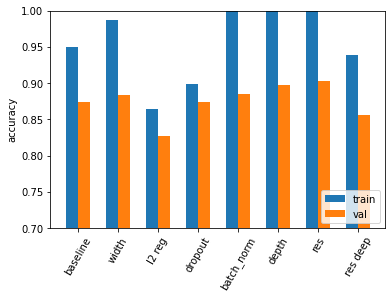

In [148]:
trn_acc = [v['train'] for k, v in all_acc_dict.items()]
val_acc = [v['val'] for k, v in all_acc_dict.items()]

width =0.3
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label='train')
plt.bar(np.arange(len(val_acc))+ width, val_acc, width=width, label='val')
plt.xticks(np.arange(len(val_acc))+ width/2, list(all_acc_dict.keys()),
           rotation=60)
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.ylim(0.7, 1)
plt.savefig('accuracy_comparison.png', bbox_inches='tight')
plt.show()


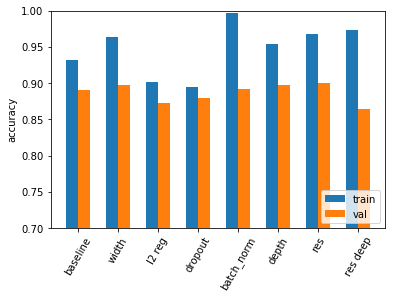


The one in below uses kernal size of 3 by 3.

In [ ]:
m1 = NetResDeep()

In [ ]:
m1

 Exercises

1 Change our model to use a 5 × 5 kernel with kernel_size=5 passed to the
nn.Conv2d constructor.

a What impact does this change have on the number of parameters in the
model?

b Does the change improve or degrade overfitting?

c Read https://pytorch.org/docs/stable/nn.html#conv2d.

d Can you describe what kernel_size=(1,3) will do?

e How does the model behave with such a kernel?

2 Can you find an image that contains neither a bird nor an airplane, but that the
model claims has one or the other with more than 95% confidence?

a Can you manually edit a neutral image to make it more airplane-like?

b Can you manually edit an airplane image to trick the model into reporting a
bird?

c Do these tasks get easier with a network with less capacity? More capacity?
